In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw04.ipynb")

# Homework 4: Bike Sharing
## Exploratory Data Analysis (EDA) and Visualization

## Due Date: Thursday Feb 16, 11:59 PM
You must submit this assignment to Gradescope by the on-time deadline, Thursday, Feburary 16, 11:59pm. Please read the syllabus for the grace period policy. No late
submissions beyond the grace period will be accepted. **We strongly encourage you to plan to submit your work to Gradescope several hours before the stated deadline.** This way, you will have ample time to reach out to staff for support if you encounter difficulties with submission. While course staff is happy to help guide you with submitting your assignment ahead of the deadline, we will not respond to last-minute requests for assistance (TAs need to sleep, after all!).

Please read the instructions carefully to submit your work to both the coding and written portals of Gradescope.

## Collaboration Policy

Data science is a collaborative activity. While you may talk with others about
the homework, we ask that you **write your solutions individually**. If you do
discuss the assignments with others please **include their names** at the top
of your notebook.


**Collaborators**: *list collaborators here*

## Introduction

Bike sharing systems are a new generation of traditional bike rentals where the process of signing up, renting and returning is automated. Through these systems, users are able to easily rent a bike from one location and return them to another. We will be analyzing bike sharing data from Washington D.C. 

In this assignment, you will perform tasks to clean, visualize, and explore the bike sharing data. You will also investigate open-ended questions. These open-ended questions ask you to think critically about how the plots you have created provide insight into the data.

After completing this assignment, you should be comfortable with:

* Reading plaintext delimited data into `pandas`
* Wrangling data for analysis
* Using EDA to learn about your data 
* Making informative plots

## Grading
Grading is broken down into autograded answers and free response. 

For autograded answers, the results of your code are compared to provided and/or hidden tests.

For free response, readers will evaluate how well you answered the question and/or fulfilled the requirements of the question. Most of the plots will be manually graded. Your plots should be *similar* to the given examples. We will tolerate small variations such as color differences or slight variations in scale. However it is in your best interest to make the plots as similar as possible, as similarity is subject to the readers. **Note that for ALL plotting questions from here on out, we will expect descriptive titles, axis labels, legends, etc. The following question serves as a good guideline on what is "enough": If I directly downloaded the plot and viewed it, would I be able to tell what was being visualized without knowing the question?** 

### Score breakdown



Question | Manual | Points
--- |---| ---
0a |Yes |1
0b |Yes |1
1a |No |2
1b |No |1
1c |No |3
2a |Yes |2
2b |Yes |2
2c |Yes |2
2d |Yes |2
3a |Yes |3
3b |Yes |1
3c |Yes |3
4  |Yes |2
5a |Yes |3
5b |Yes |2
6a |No |1
6b |Yes |4
6c |Yes |2
7a |Yes |2
7b |Yes |2
Total |15 |41

In [2]:
# Run this cell to set up your notebook. Make sure ds100_utils.py is in this assignment's folder
import seaborn as sns
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zipfile
from pathlib import Path
import ds100_utils

# Default plot configurations
%matplotlib inline
plt.rcParams['figure.figsize'] = (16,8)
plt.rcParams['figure.dpi'] = 150
sns.set()

import warnings
warnings.filterwarnings("ignore")

from IPython.display import display, Latex, Markdown

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## Loading Bike Sharing Data
The data we are exploring is collected from a bike sharing system in Washington D.C.

The variables in this data frame are defined as:

Variable       | Description
-------------- | ------------------------------------------------------------------
instant | record index
dteday | date
season | 1. spring <br> 2. summer <br> 3. fall <br> 4. winter
yr | year (0: 2011, 1:2012)
mnth | month ( 1 to 12)
hr | hour (0 to 23)
holiday | whether day is holiday or not
weekday | day of the week
workingday | if day is neither weekend nor holiday
weathersit | 1. clear or partly cloudy <br> 2. mist and clouds <br> 3. light snow or rain <br> 4. heavy rain or snow
temp | normalized temperature in Celsius (divided by 41)
atemp | normalized "feels-like" temperature in Celsius (divided by 50)
hum | normalized percent humidity (divided by 100)
windspeed| normalized wind speed (divided by 67)
casual | count of casual users
registered | count of registered users
cnt | count of total rental bikes including casual and registered  

### Download the Data

In [3]:
# Run this cell to download the data, no further action is needed

data_url = 'https://github.com/DS-100/fa20/raw/gh-pages/resources/assets/datasets/hw3-bikeshare.zip'
file_name = 'data.zip'
data_dir = '.'

dest_path = ds100_utils.fetch_and_cache(data_url=data_url, data_dir=data_dir, file=file_name)
print('Saved at {}'.format(dest_path))

zipped_data = zipfile.ZipFile(dest_path, 'r')

data_dir = Path('data')
zipped_data.extractall(data_dir)


print("Extracted Files:")
for f in data_dir.glob("*"):
    print("\t",f)

Using version already downloaded: Mon Feb 13 05:25:03 2023
MD5 hash of file: 2bcd2ca89278a8230f4e9461455c0811
Saved at data.zip
Extracted Files:
	 data/bikeshare.txt


### Examining the File Contents

Can you identify the file format? (No answer required.)

In [4]:
# Run this cell to look at the top of the file, no further action is needed
for line in ds100_utils.head(data_dir/'bikeshare.txt'):
    print(line,end="")

instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.8,0,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.8,0,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0,3,10,13


### Size
Is the file big?  How many records do we expect to find? (No answers required.)

In [5]:
# Run this cell to view some metadata, no further action is needed
print("Size:", (data_dir/"bikeshare.txt").stat().st_size, "bytes")
print("Line Count:", ds100_utils.line_count(data_dir/"bikeshare.txt"), "lines")

Size: 1156736 bytes
Line Count: 17380 lines


### Loading the Data

The following code loads the data into a `Pandas DataFrame`.

In [6]:
# Run this cell to load the data, no further action is needed
bike = pd.read_csv(data_dir/'bikeshare.txt')
bike.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Below, we show the shape of the file. You should see that the size of the `DataFrame` matches the number of lines in the file, minus the header row.

In [7]:
bike.shape

(17379, 17)

<hr style="border: 1px solid #fdb515;" />

## 0: Examining the Data

Before we start working with the data, let's examine its granularity.

<!-- BEGIN QUESTION -->

<br><br>

--- 
### Question 0a
What is the granularity of the data (i.e. what does each row represent)?


_Each record represents the data at each hour of a day._

<!-- END QUESTION -->



In [8]:
# Use this cell for scratch work. If you need to add more cells for scratch work, add them BELOW this cell.
#bike[bike['holiday']==1]

<!-- BEGIN QUESTION -->

<br><br>

--- 
### Question 0b
For this assignment, we'll be using this data to study bike usage in Washington D.C. Based on the granularity and the variables present in the data, what might some limitations of using this data be? What are two additional data categories/variables that one could collect to address some of these limitations?


_Collecting the bike counts at every hour may be collecting too much data. We can address this by binning the hours to create wider groups as a new variable, like a bin for every 2 or 3 hours. We can also add a categorical variable that bins the hours by morning, afternoon, evening, night. Another issue is the purpose for biking and the locations where people biked._

<!-- END QUESTION -->



In [9]:
# Use this cell for scratch work. If you need to add more cells for scratch work, add them BELOW this cell.

<hr style="border: 1px solid #fdb515;" />

## 1: Data Preparation
A few of the variables that are numeric/integer actually encode categorical data. These include `holiday`, `weekday`, `workingday`, and `weathersit`. In the following problem, we will convert these four variables to strings specifying the categories. In particular, use 3-letter labels (`Sun`, `Mon`, `Tue`, `Wed`, `Thu`, `Fri`, and `Sat`) for `weekday`. You may simply use `yes`/`no` for `holiday` and `workingday`. 

In this question we will *mutate* the `DataFrame`, **overwriting the corresponding variables in the data frame.** However, our notebook will effectively document this in-place data transformation for future readers. Make sure to leave the underlying datafile `bikeshare.txt` unmodified.

<br><br>

--- 
### Question 1a (Decoding `weekday`, `workingday`, and `weathersit`)


Decode the `holiday`, `weekday`, `workingday`, and `weathersit` fields:

1. `holiday`: Convert to `yes` and `no`.  Hint: There are fewer holidays...
1. `weekday`: It turns out that Monday is the day with the most holidays.  Mutate the `'weekday'` column to use the 3-letter label (`'Sun'`, `'Mon'`, `'Tue'`, `'Wed'`, `'Thu'`, `'Fri'`, and `'Sat'` ...) instead of its current numerical values. Assume `0` corresponds to `Sun`, `1` to `Mon` and so on, in order of the previous sentence.
1. `workingday`: Convert to `yes` and `no`.
1. `weathersit`: You should replace each value with one of `Clear`, `Mist`, `Light`, or `Heavy`. Assume `1` corresponds to `Clear`, `2` corresponds to `Mist`, and so on in order of the previous sentence.

**Note:** If you mutate any of the tables above, then they will not be in the format of their original `.csv` file. As a debugging tip, if you want to revert changes, run the cell that reloads the csv.

**Hint:**  One approach is to use the `.replace`[(documentation)](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html) method of the `Pandas DataFrame` class. Take a look at the link.

In [10]:
# Modify holiday weekday, workingday, and weathersit here.
bike = bike.replace({'holiday':{0:"no", 1:"yes"},
                     'weekday':{0:"Sun", 1:"Mon", 2:"Tue", 3:"Wed", 4:"Thu", 5:"Fri", 6:"Sat"},
                     'workingday':{0:"no", 1:"yes"},
                     'weathersit':{1:"Clear", 2:"Mist", 3:"Light", 4:"Heavy"}})
bike.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,no,Sat,no,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,no,Sat,no,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,no,Sat,no,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,no,Sat,no,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,no,Sat,no,Clear,0.24,0.2879,0.75,0.0,0,1,1


In [11]:
grader.check("q1a")

q1a results: All test cases passed!

<br><br>

--- 
### Question 1b (Holidays)

How many entries in the data correspond to holidays?  Set the variable `num_holidays` to this value.

In [12]:
num_holidays = bike[bike['holiday']=='yes'].shape[0]
num_holidays

500

In [13]:
grader.check("q1b")

q1b results: All test cases passed!

<br><br>

--- 
### Question 1c (Computing Daily Total Counts)
In the next few questions, we will be analyzing the daily number of registered and unregistered users.

Construct a data frame named `daily_counts` indexed by `dteday` with the following columns:
* `casual`: total number of casual riders for each day
* `registered`: total number of registered riders for each day
* `workingday`: whether that day is a working day or not (`yes` or `no`)

In [14]:
daily_counts = bike.groupby('dteday')\
    .agg({'casual':'sum', 'registered':'sum', 'workingday':'first'})
daily_counts.head()

,casual,registered,workingday
dteday,,,
2011-01-01,331,654,no
2011-01-02,131,670,no
2011-01-03,120,1229,yes
2011-01-04,108,1454,yes
2011-01-05,82,1518,yes


In [15]:
grader.check("q1c")

q1c results: All test cases passed!

<hr style="border: 1px solid #fdb515;" />

## 2: Exploring the Distribution of Riders

Let's begin by comparing the distribution of the daily counts of casual and registered riders. Questions 2-7 require using many visualization methods so for your convenience, we have summarized a few useful ones below.

### Matplotlib and Seaborn Table of Common Functions

`x` and `y` are sequences of values (i.e. arrays, lists, or Series).

| Function | Description |
| -------- | ----------- |
| `plt.title(name)` | Adds a title `name` to the current plot |
| `plt.xlabel(name)` | Adds a label `name` to the x-axis |
| `plt.ylabel(name)` | Adds a label `name` to the y-axis |
| `plt.plot(x, y)` | Creates a line plot of `x` against `y` |
| `plt.scatter(x, y)` | Creates a scatter plot of `x` against `y` |
| `plt.hist(x, bins=None)` | Creates a histogram of `x`; `bins` can be an integer or a sequence |
| `plt.bar(x, height)` | Creates a bar plot of categories `x` and corresponding heights `height` |
| `sns.histplot(data, x, y, hue, kde)` | Creates a distribution plot; `data` is a `DataFrame`; `x`, `y` are column names in `data` that specify positions on the x and y axes; `hue` is a column name in `data` that adds subcategories to the plot based on `hue`; `kde` is a boolean that determines whether to overlay a KDE curve |
|`sns.lineplot(data, x, y, hue)` | Creates a line plot |
|`sns.scatterplot(data, x, y, hue, size)` | Creates a scatter plot; `size` is a vector that contains the size of point for each subcategory based on `hue` |
|`sns.kdeplot(x, y)` |  Creates a kernel density estimate plot; `x`, `y` are series of data that indicate positions on the `x` and `y` axis |
|`sns.jointplot(x, y, data, kind)` | Creates a joint plot of 2 variables with KDE plot in the middle and a distribution plot for each variable on the sides; `kind` determines the visualization type for the distribution plot, can be `scatter`, `kde` or `hist` |

**Note**: This list of functions and parameters is **not** exhaustive. You may need to reference and explore more documentation to answer the following questions, but we will help you through that process. 

<!-- BEGIN QUESTION -->

<br><br>

--- 
### Question 2a

Use the `sns.histplot`[(documentation)](https://seaborn.pydata.org/generated/seaborn.histplot.html#seaborn.histplot) function to create a plot that overlays the distribution of the daily counts of bike users, using blue to represent `casual` riders, and green to represent `registered` riders. The temporal granularity of the records should be daily counts, which you should have after completing question 1c.

**Hint:** You will need to set the `stat` parameter appropriately to match the desired plot, and may call `sns.histplot` more than one time.

Include a `legend`, `xlabel`, `ylabel`, and `title`. Read the [seaborn plotting tutorial](https://seaborn.pydata.org/tutorial/distributions.html), if you're not sure how to add these. After creating the plot, look at it and make sure you understand what the plot is actually telling us, e.g on a given day, the most likely number of registered riders we expect is ~4000, but it could be anywhere from nearly 0 to 7000.

<img src='images/casual_v_registered.png' width="700px" />


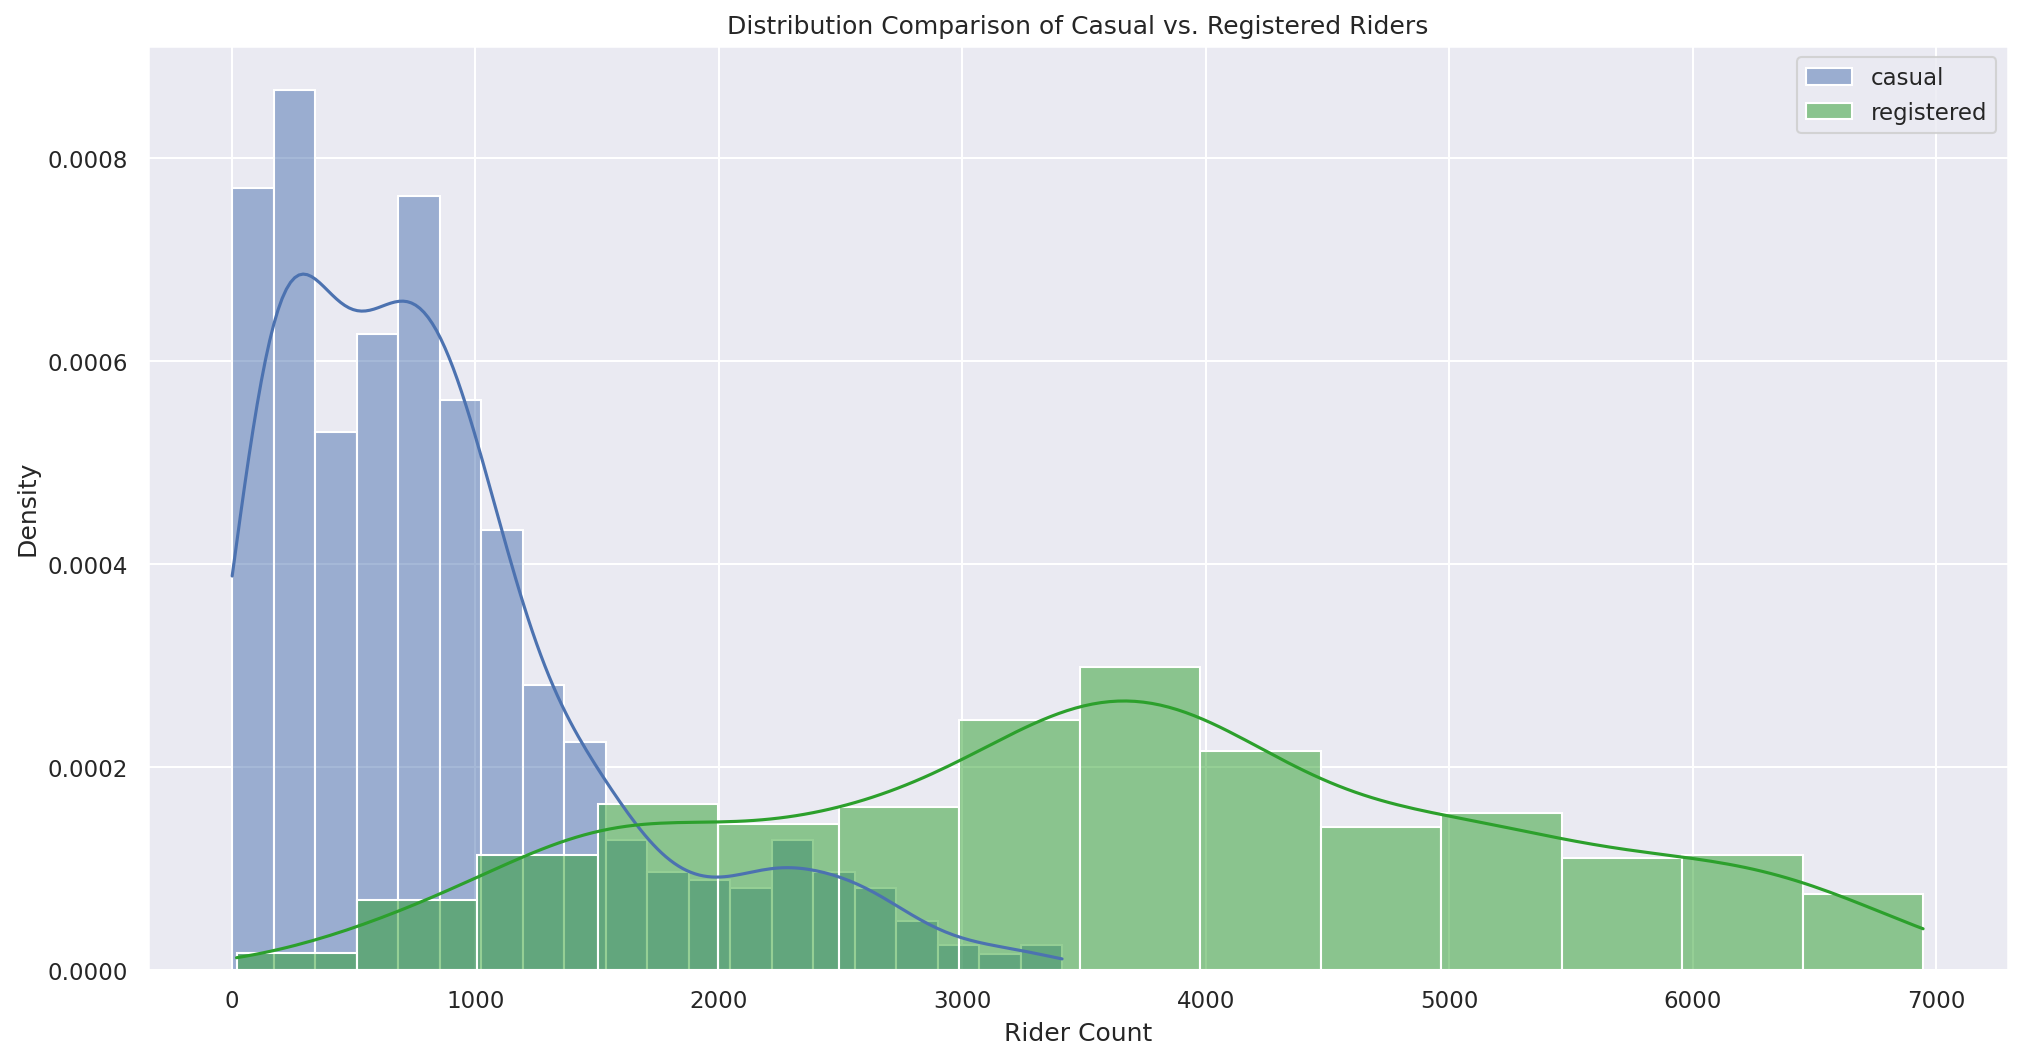

In [17]:
sns.histplot(data=daily_counts, x=daily_counts['casual'], stat='density', kde=True, label='casual')
sns.histplot(data=daily_counts, x=daily_counts['registered'], stat='density', color='tab:green', kde=True, label='registered')
plt.title('Distribution Comparison of Casual vs. Registered Riders')
plt.xlabel('Rider Count')
plt.ylabel('Density')
plt.legend();

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<br><br>

--- 
### Question 2b

In the cell below, descibe the differences you notice between the density curves for casual and registered riders.  Consider concepts such as modes, symmetry, skewness, tails, gaps and outliers.  Include a comment on the spread of the distributions. 

_The blue histogram for casual riders is much more centered on the left of the graph while the green histogram for registered riders is centered more to the middle right. The casual distribution is skewed right with possibly 2 modes. There are no noticeable gaps or outliers. Its data are clustered mostly between the rider counts 0 and 1000. The registered distribution is roughly unimodal and symmetric with a possible gap between 2000 and 3000. Its distribution is has one mode and no significant skewness, tails, or outliers. The spread for the registered riders is much larger than that of the casual riders_

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<br><br>

--- 
### Question 2c

The density plots do not show us how the counts for registered and casual riders vary together. Use `sns.lmplot` [(documentation)](https://seaborn.pydata.org/generated/seaborn.lmplot.html) to make a scatter plot to investigate the relationship between casual and registered counts. This time, let's use the `bike DataFrame` to plot hourly counts instead of daily counts.

The `lmplot` function will also try to draw a linear regression line (just as you saw in Data 8). Color the points in the scatterplot according to whether or not the day is a working day (your colors do not have to match ours exactly, but they should be different based on whether the day is a working day). 


<img src='images/casual_registered_working_nonworking.png' width="600px" />

**Hints:** 
* Checkout this helpful [tutorial on `lmplot`](https://seaborn.pydata.org/tutorial/regression.html).
* There are many points in the scatter plot, so make them small to help reduce overplotting. Check out the `scatter_kws` parameter of `lmplot`.
* Generate and plot the linear regression line by setting a **paramter** of `lmplot` to `True`. Can you find this in the documentation? We will discuss what is linear regression is more details later. 
* You can set the `height` parameter if you want to adjust the size of the `lmplot`.
* Add a descriptive title and axis labels for your plot.

''

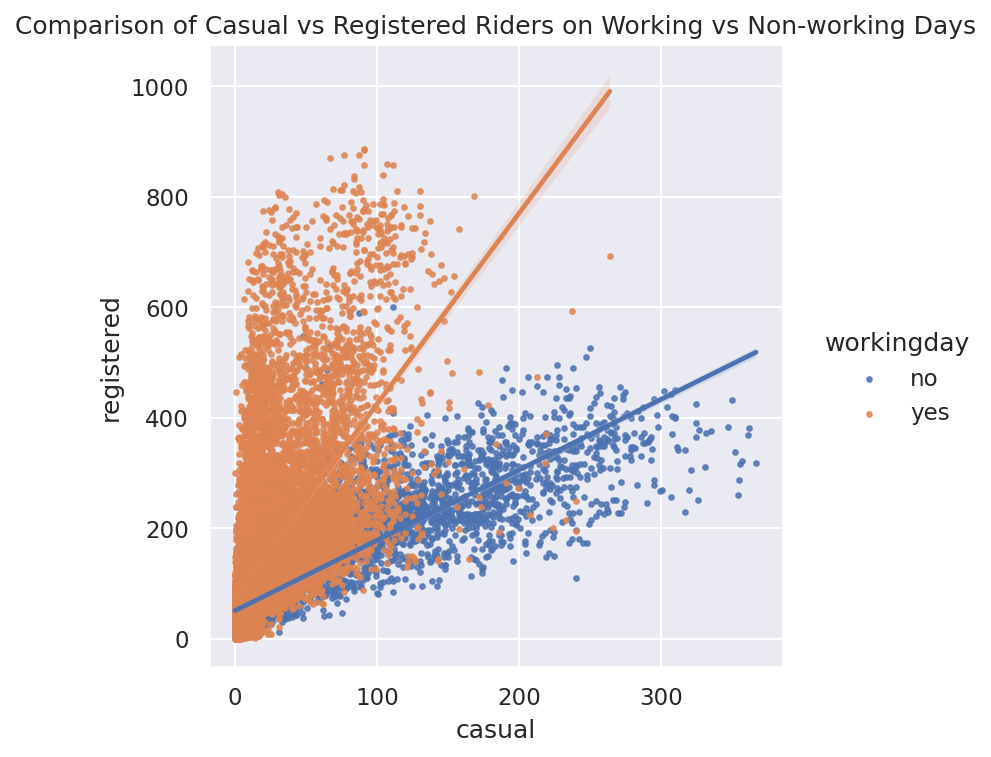

In [18]:
# Make the font size a bit bigger
sns.set(font_scale=1)
sns.lmplot(data=bike, x='casual', y='registered', hue='workingday', scatter_kws={"s": 5}, fit_reg=True)
plt.title('Comparison of Casual vs Registered Riders on Working vs Non-working Days')
;

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<br><br>

--- 
### Question 2d

What does this scatterplot seem to reveal about the relationship (if any) between casual and registered riders and whether or not the day is on the weekend? What effect does overplotting have on your ability to describe this relationship?


_For the non-working days, there appears to be a positive linear associtation between casual and registered riders, but the association is not as clear on working days. For working days, majority of the data appears to be above the regression line, but there are quite a few outliers below it that skew the line a bit. Overplotting impacts our ability to see a general idea of the shape of the data and a general description of the relationship. In addition, the data is too dense near the origin so we cannot tell anything about clustering in more specific detail._

<!-- END QUESTION -->

<hr style="border: 1px solid #fdb515;" />

## 3: Visualization


 
To address overplotting, let's try visualizing the data with another technique, the bivariate kernel density estimate.

You will want to read up on the documentation for `sns.kdeplot`, which can be found [here](https://seaborn.pydata.org/generated/seaborn.kdeplot.html).

The result we wish to achieve should be a plot that looks like this:

<img src='images/bivariate_kde_of_daily_rider_types_simple.png' width="600px" />

A basic kde plot of all the data is quite easy to generate. However, this plot includes both weekend and weekday data, which isn't what we want (see example figure above).

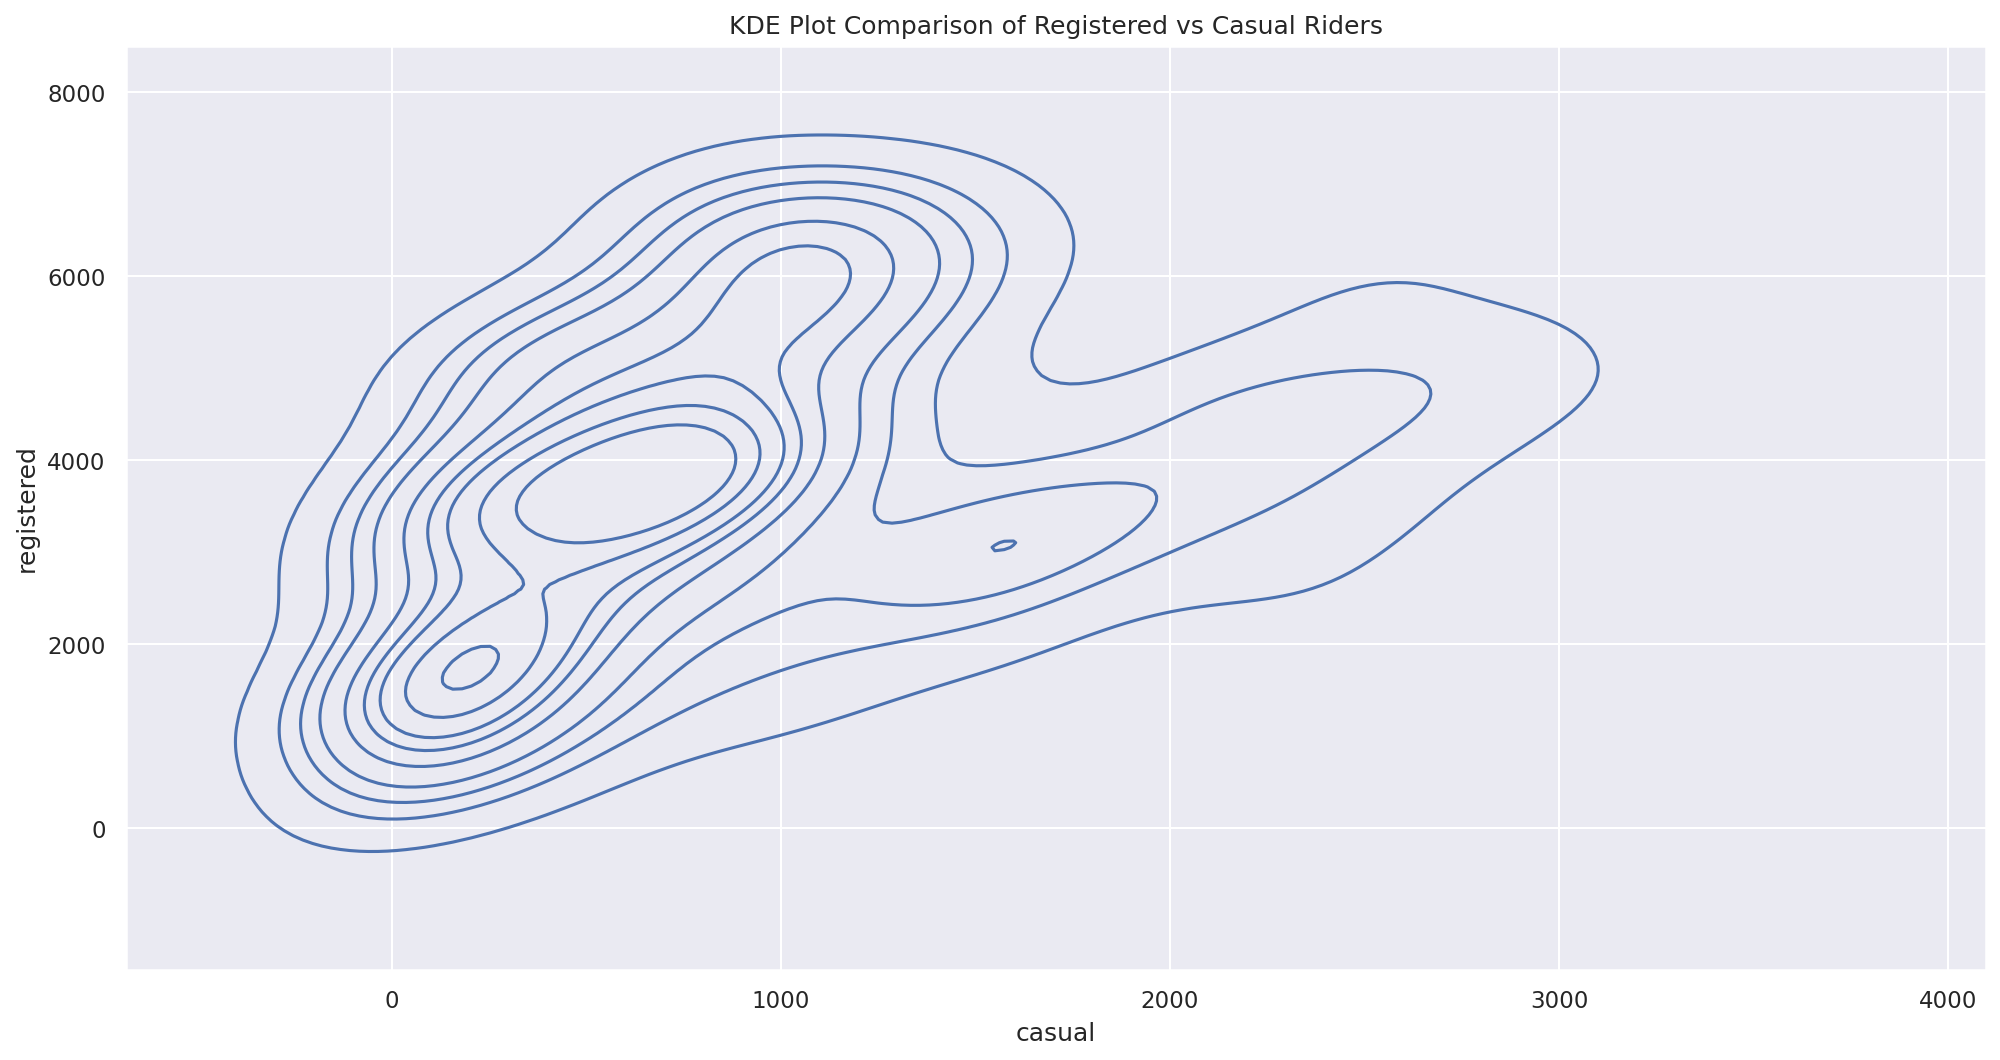

In [19]:
sns.kdeplot(x=daily_counts['casual'], y=daily_counts['registered'])
plt.title('KDE Plot Comparison of Registered vs Casual Riders');

<!-- BEGIN QUESTION -->

<br><br>

--- 

### Question 3a (Bivariate Kernel Density Plot)

Generating a bivariate kernel density plot with workday and non-workday separated.

**Hints:** You only need to call `sns.kdeplot` once. Take a look at the `hue` paramter and adjust other inputs as needed.
 
After you get your plot working, experiment by setting `shade=True` in `kdeplot` to see the difference between the shaded and unshaded version. Please submit your work with `shade=False`. 

''

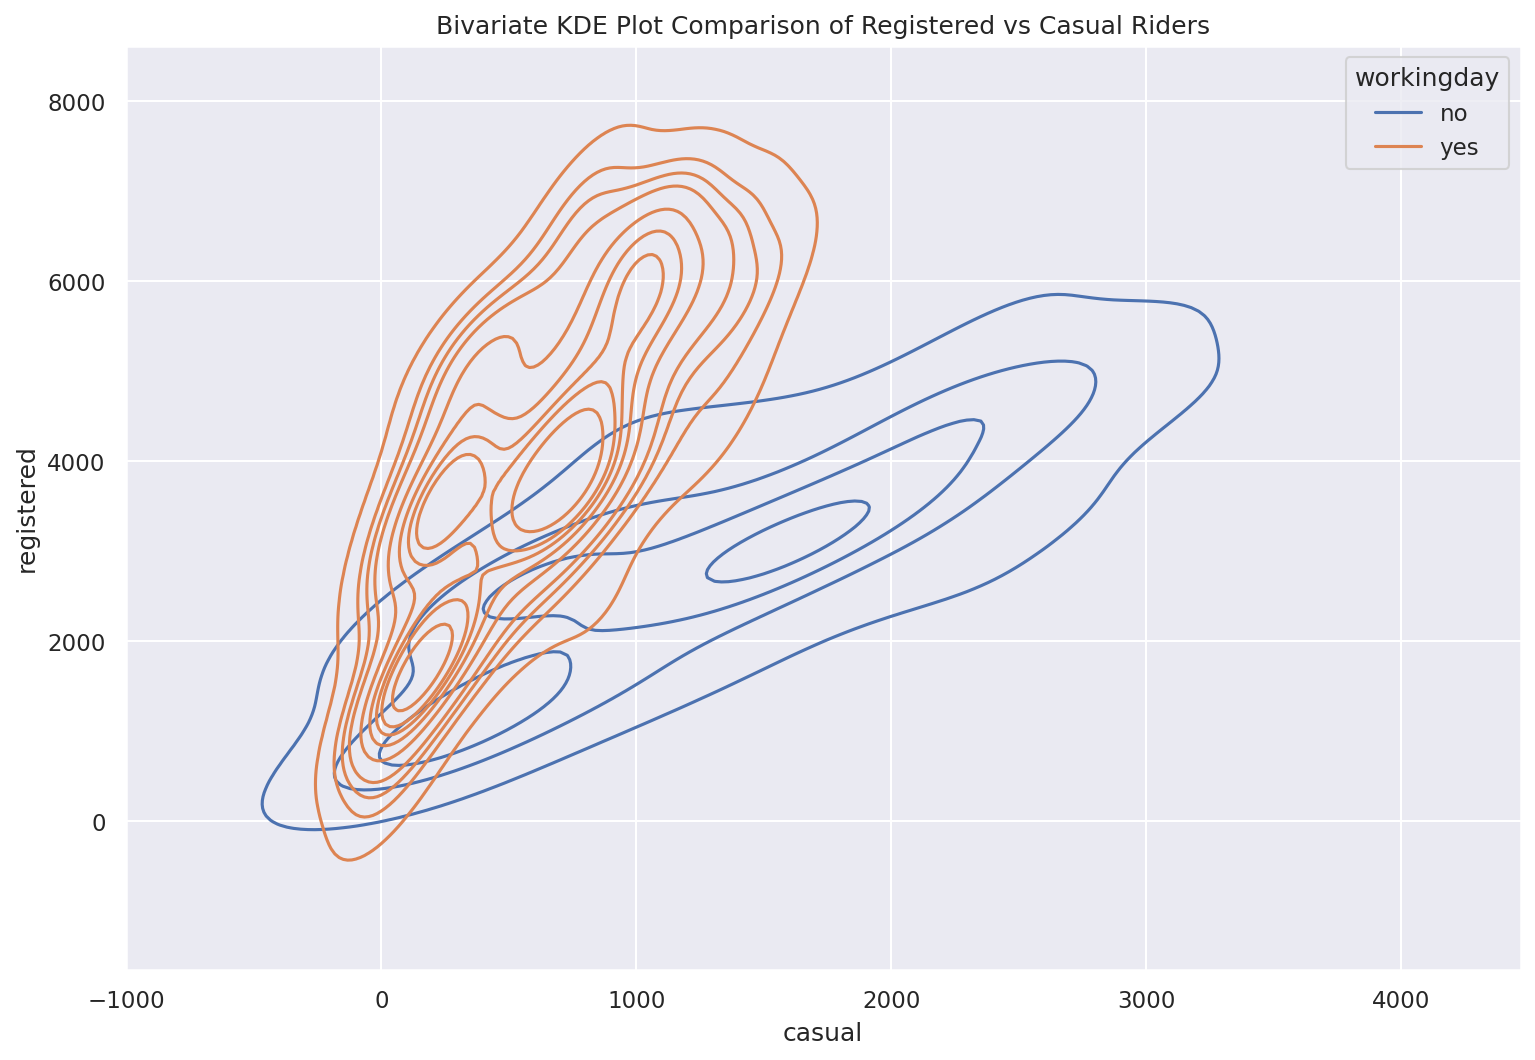

In [20]:
# Set the figure size for the plot
plt.figure(figsize=(12,8))
sns.kdeplot(data=daily_counts, x='casual', y='registered', hue='workingday')
plt.title('Bivariate KDE Plot Comparison of Registered vs Casual Riders')
;

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<br><br>

--- 
### Question 3b
<img src='images/bivariate_kde_of_daily_rider_types_gradient.png' width="600px" />

With some modification to your 3a code (this modification is not in scope), we can obatined the plot above. In your own words, describe what the lines and the color shades of the lines signify about the data. What does each line and color represent?


_The lines and the color shades represent a topographical visualization of the data. Darker shades are more dense, which means there are more values in those regions than there are in lighter shared areas. The orange lines represent the association between casual and registered riders on workdays while the blue lines represent the association between casual and registered riders on non-workdays. Each space between the lines represent bins of data._

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<br><br>

--- 
### Question 3c

What additional details can you identify from this contour plot that were difficult to determine from the scatter plot?


_It is easier in the contour plot to determine clusters and how the density changes as we move around different parts of the graph. For example, we can see exactly where the densest parts of the data are because of the shading._

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<hr style="border: 1px solid #fdb515;" />

## 4: Joint Plot

As an alternative approach to visualizing the data, construct the following set of three plots where the main plot shows the contours of the kernel density estimate of daily counts for registered and casual riders plotted together, and the two "margin" plots (at the top and right of the figure) provide the univariate kernel density estimate of each of these variables. Note that this plot makes it harder see the linear relationships between casual and registered for the two different conditions (weekday vs. weekend).

<img src="images/joint_distribution_of_daily_rider_types.png" width="600px" />

**Hints**:
* The [seaborn plotting tutorial](https://seaborn.pydata.org/tutorial/distributions.html) has examples that may be helpful.
* Take a look at `sns.jointplot` and its `kind` parameter.
* `set_axis_labels` can be used to rename axes on the contour plot.

**Note**:
* At the end of the cell, we called `plt.suptitle` to set a custom location for the title.
* We also called `plt.subplots_adjust(top=0.9)` in case your title overlaps with your plot.


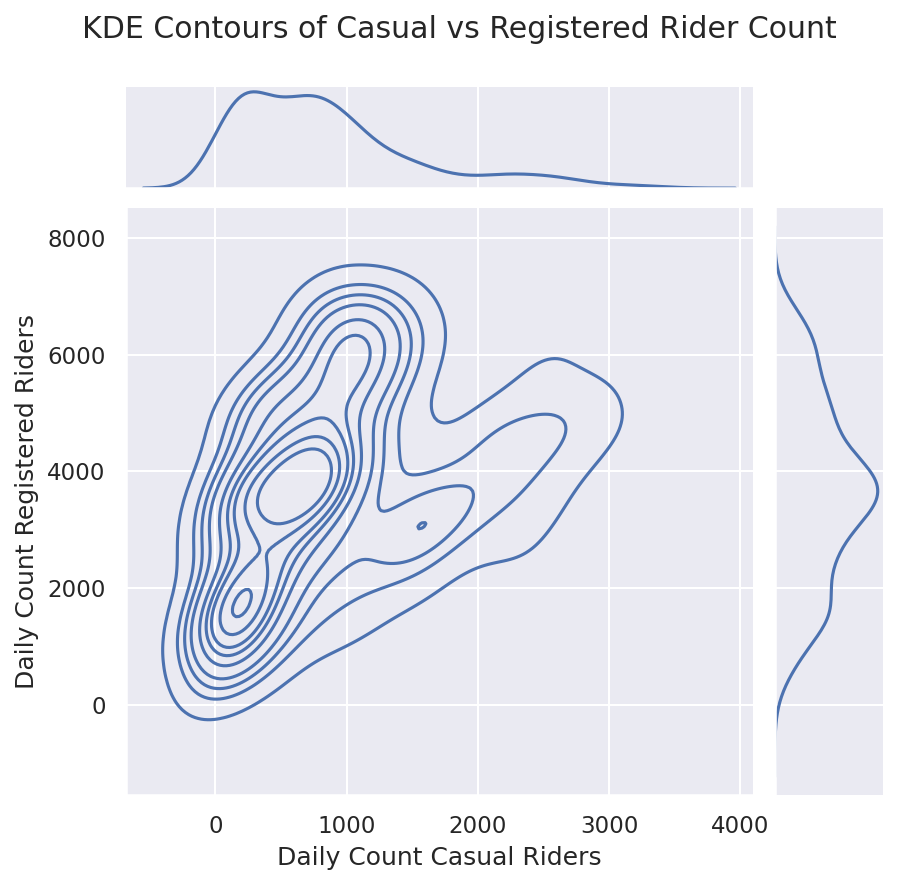

In [21]:
sns.jointplot(x=daily_counts['casual'], y=daily_counts['registered'], kind='kde')\
    .set_axis_labels(xlabel='Daily Count Casual Riders', ylabel='Daily Count Registered Riders')
plt.suptitle("KDE Contours of Casual vs Registered Rider Count")
plt.subplots_adjust(top=0.9);

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<hr style="border: 1px solid #fdb515;" />

## 5: Understanding Daily Patterns

<br><br>

--- 

### Question 5a
Let's examine the behavior of riders by plotting the average number of riders for each hour of the day over the **entire dataset**, stratified by rider type.  

Your plot should look like the plot below. While we don't expect your plot's colors to match ours exactly, your plot should have legend in the plot and different colored lines for different kinds of riders.

<img src="images/diurnal_bikes.png" width="600px"/>


''

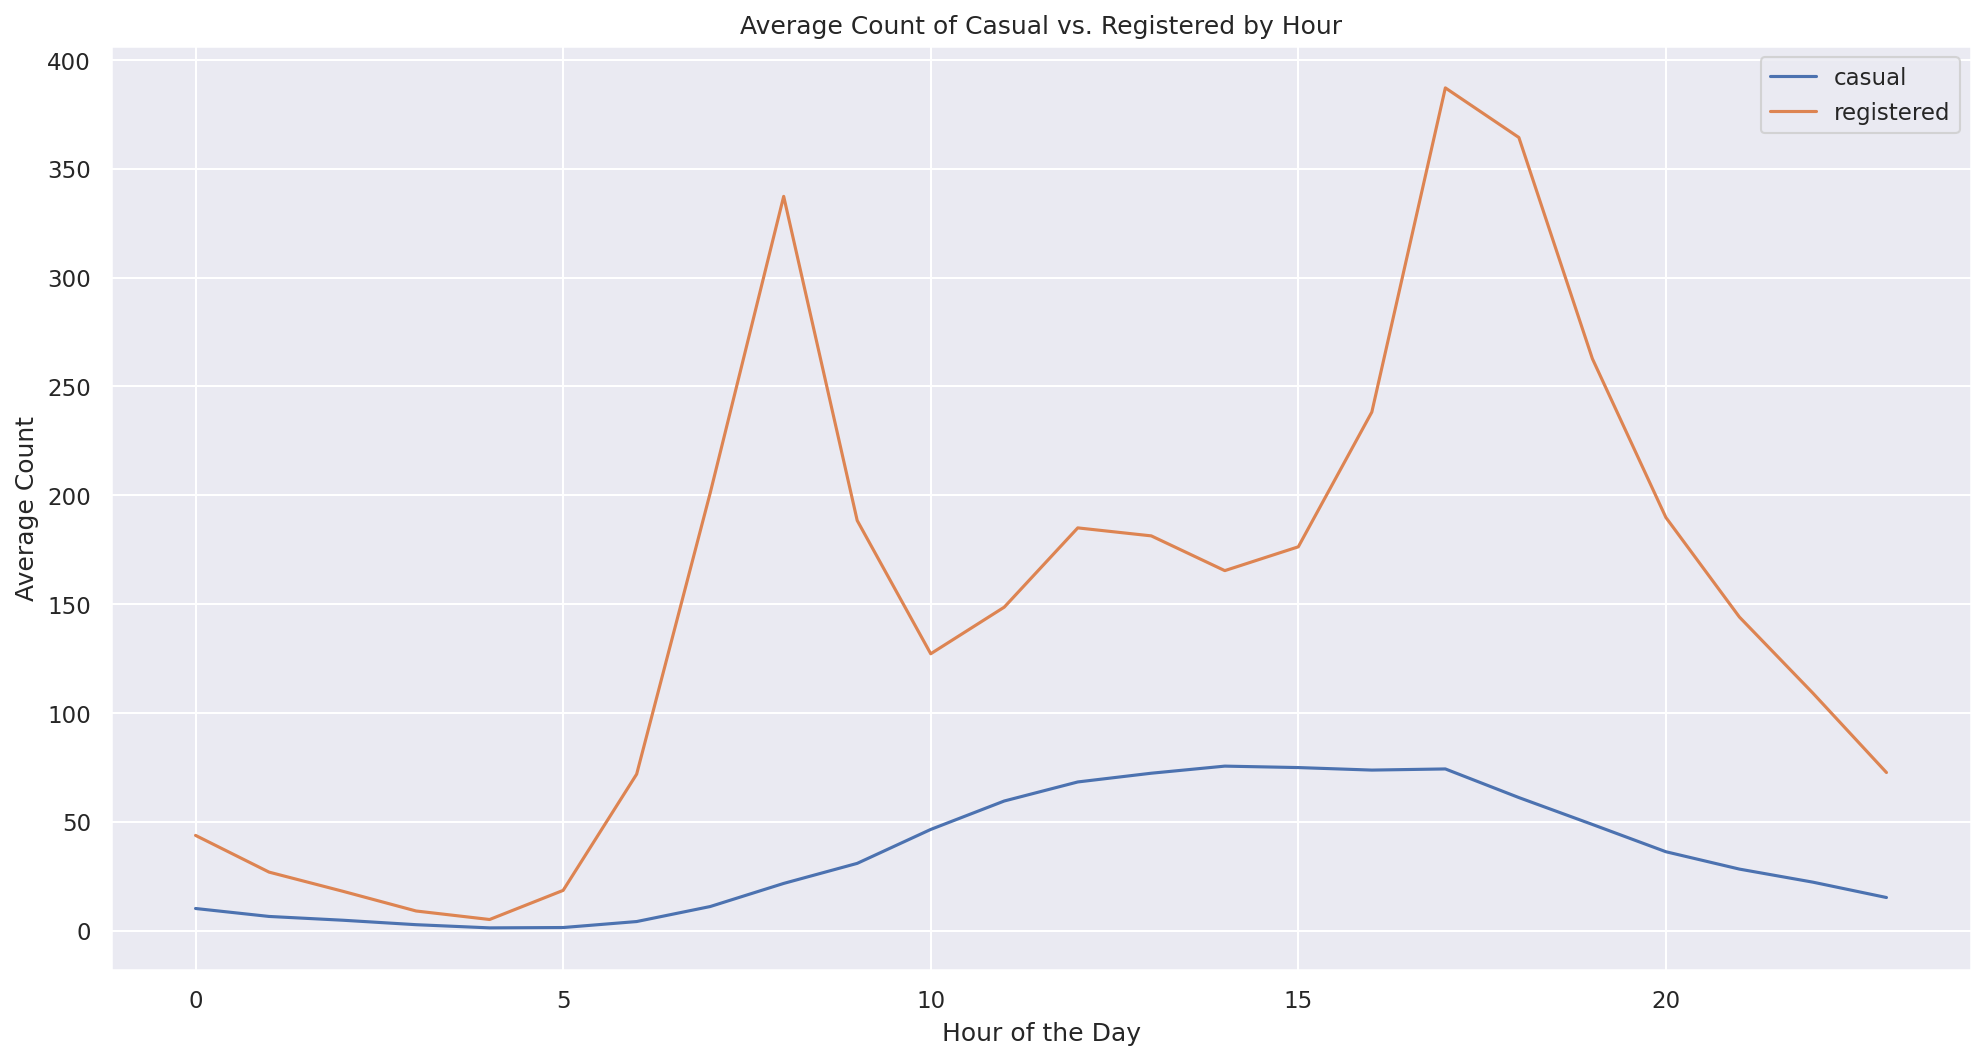

In [22]:
by_hour = bike.groupby('hr').mean()[['casual', 'registered']].reset_index()
by_hour.head()

sns.lineplot(data=by_hour, x='hr', y='casual')
sns.lineplot(data=by_hour, x='hr', y='registered')
plt.title('Average Count of Casual vs. Registered by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Count')
plt.legend(['casual', 'registered'])
;

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<br><br>

--- 
### Question 5b

What can you observe from the plot? Discuss your obseravtion and hypothesize about the meaning of the peaks in the registered riders' distribution.

_For the registered bikers, there are two peaks around 8am and 5pm, which is also the time at which people are usually commuting to and from work. It makes sense that there's a valley in the registered curve during the work hours. For the casual bikers, there is a gradual peak in the afternoon/early evening, probably because people have more leisurely time in the afternoon._

<!-- END QUESTION -->

<hr style="border: 1px solid #fdb515;" />

## 6: Exploring Ride Sharing and Weather
Now let's examine how the weather is affecting rider's behavior. First let's look at how the proportion of casual riders changes as weather changes.

<br><br>

--- 

### Question 6a
Create a new column `prop_casual` in the `bike` DataFrame representing the proportion of casual riders out of all riders for each record.

In [23]:
bike['prop_casual'] = bike['casual'] / bike['cnt']

In [24]:
grader.check("q6a")

q6a results: All test cases passed!


In order to examine the relationship between proportion of casual riders and temperature, we can create a scatterplot using [`sns.scatterplot`](https://seaborn.pydata.org/generated/seaborn.scatterplot.html). We can even use color/hue to encode the information about day of week. Run the cell below, and you'll see we end up with a big mess that is impossible to interpret.

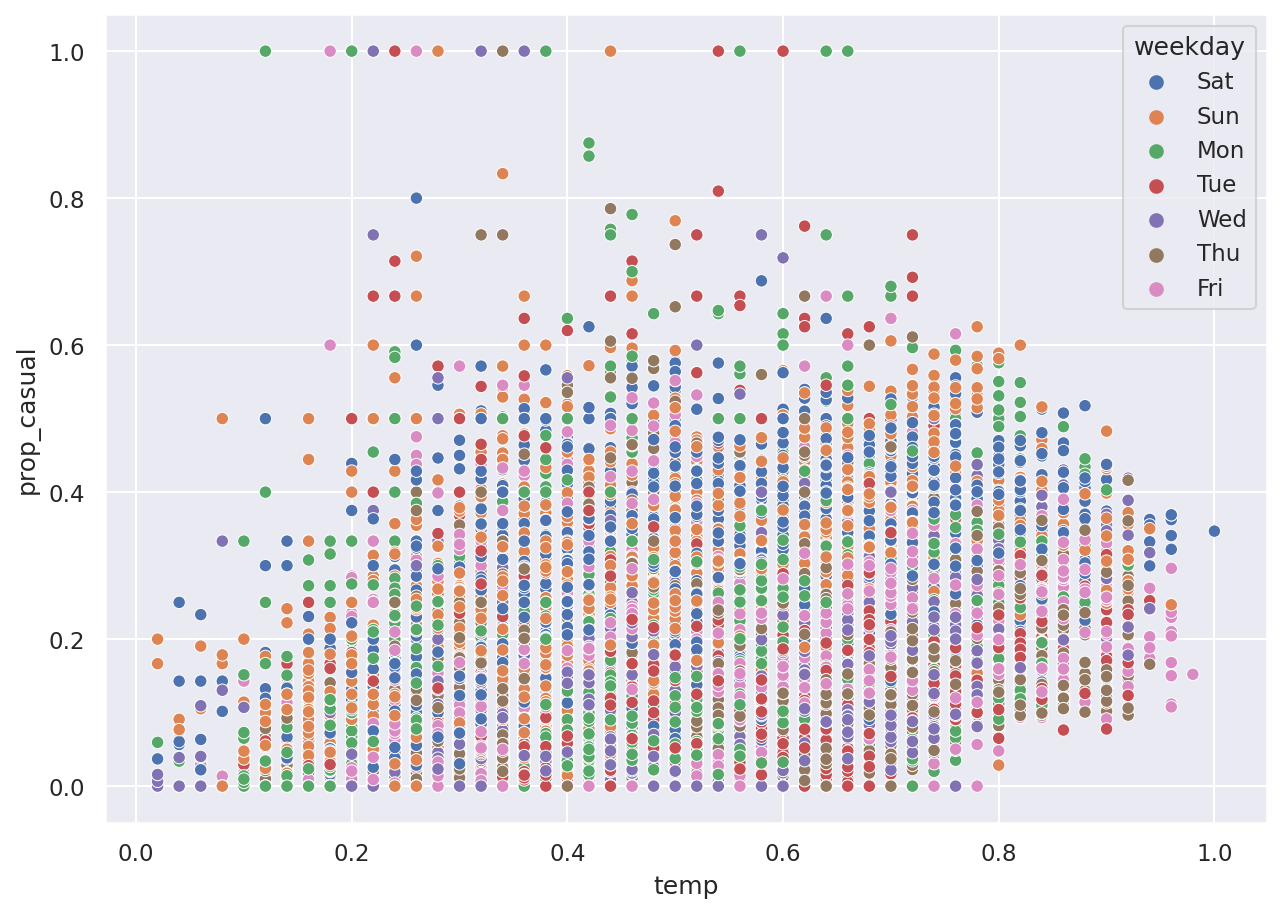

In [25]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data=bike, x="temp", y="prop_casual", hue="weekday");

We could attempt linear regression using `sns.lmplot` as shown below, which hint at some relationships between temperature and proportional casual, but the plot is still fairly unconvincing. 

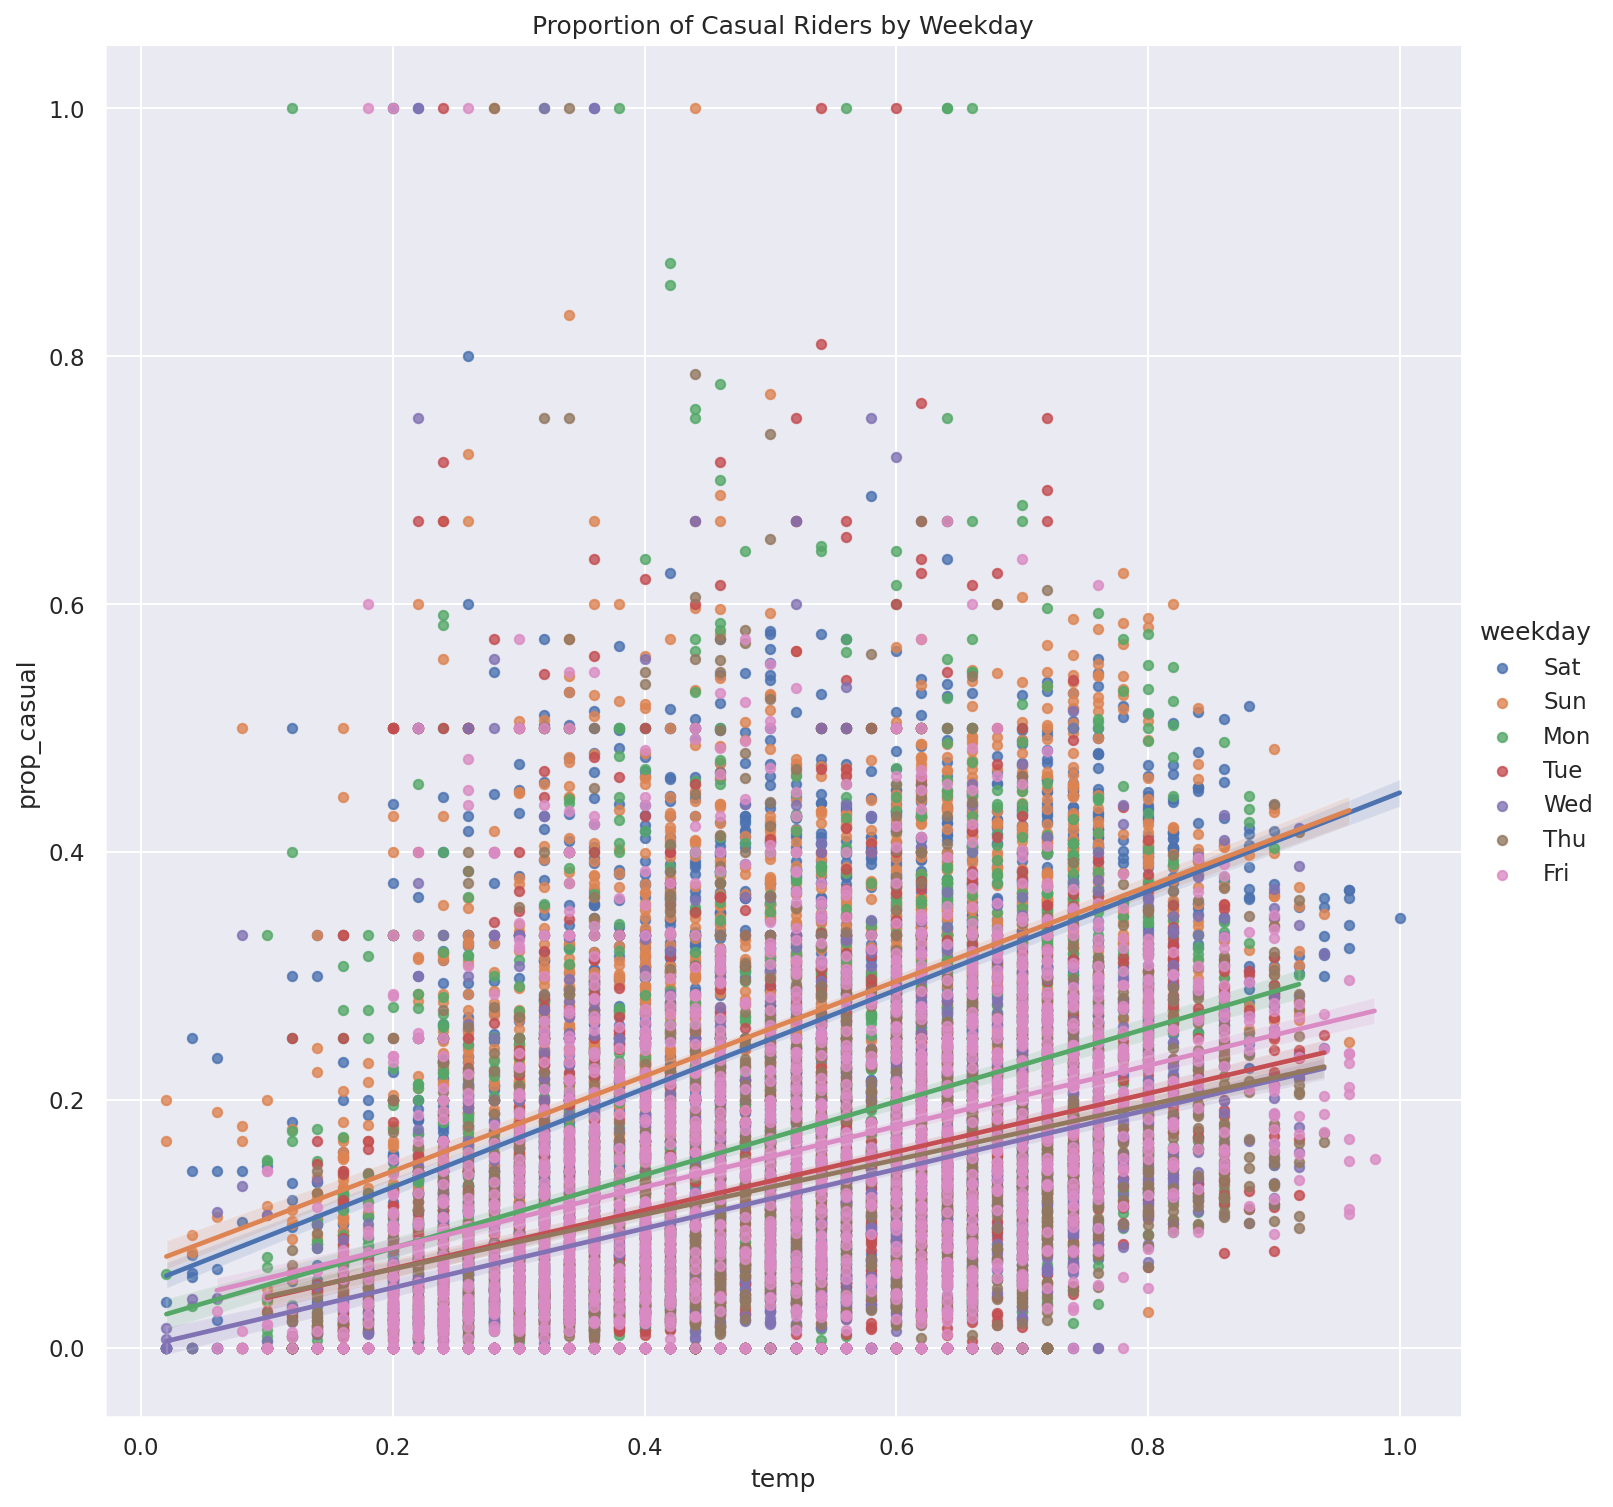

In [26]:
sns.lmplot(data=bike, x="temp", y="prop_casual", hue="weekday", scatter_kws={"s": 20}, height=10)
plt.title("Proportion of Casual Riders by Weekday");

A better approach is to use local smoothing. The basic idea is that for each x value, we compute some sort of representative y value that captures the data close to that x value. One technique for local smoothing is "Locally Weighted Scatterplot Smoothing" or LOWESS. An example is below. The red curve shown is a smoothed version of the scatterplot.

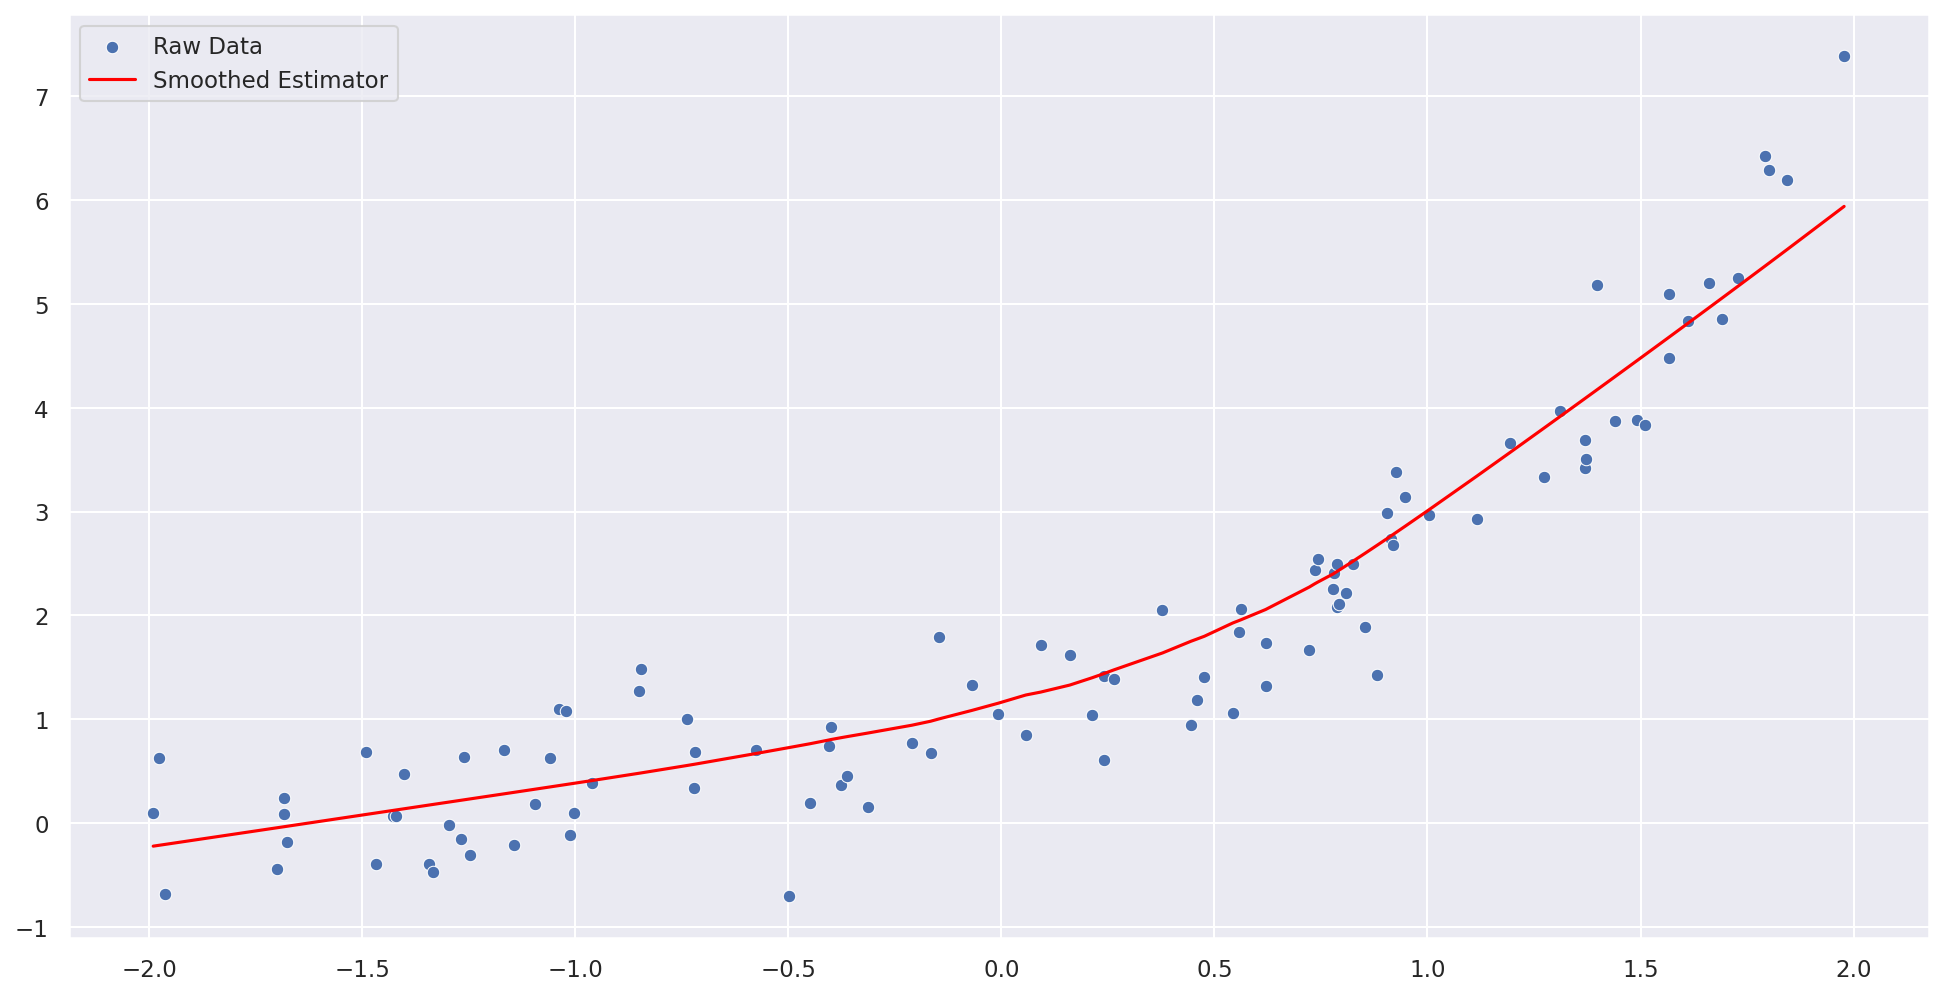

In [27]:
from statsmodels.nonparametric.smoothers_lowess import lowess
# Make noisy data
xobs = np.sort(np.random.rand(100)*4.0 - 2)
yobs = np.exp(xobs) + np.random.randn(100) / 2.0
sns.scatterplot(xobs, yobs, label="Raw Data")

# Predict 'smoothed' valued for observations
ysmooth = lowess(yobs, xobs, return_sorted=False)
sns.lineplot(xobs, ysmooth, label="Smoothed Estimator", color='red')
plt.legend();

<!-- BEGIN QUESTION -->

<br><br>

--- 
### Question 6b

In our case with the bike ridership data, we want 7 curves, one for each day of the week. The x-axis will be the temperature and the y-axis will be a smoothed version of the proportion of casual riders.

<img src="images/curveplot_temp_prop_casual.png" width="600px" />

You should use [`statsmodels.nonparametric.smoothers_lowess.lowess`](http://www.statsmodels.org/dev/generated/statsmodels.nonparametric.smoothers_lowess.lowess.html) just like the example above. Unlike the example above, plot ONLY the lowess curve. Do not plot the actual data, which would result in overplotting. For this problem, the simplest way is to use a loop.

You do not need to match the colors on our sample plot as long as the colors in your plot make it easy to distinguish which day they represent.

**Hints:** 
* Start by just plotting only one day of the week to make sure you can do that first.

* The `lowess` function expects y coordinate first, then x coordinate. You should also set the `return_sorted` field to `False`.

* Look at the top of this homework notebook for a description of the (normalized) temperature field to know how to convert to Fahrenheit. By default, the temperature field ranges from 0.0 to 1.0. In case you need it, $\text{Fahrenheit} = \text{Celsius} \times \frac{9}{5} + 32$.

Note: If you prefer plotting temperatures in Celsius, that's fine as well!

''

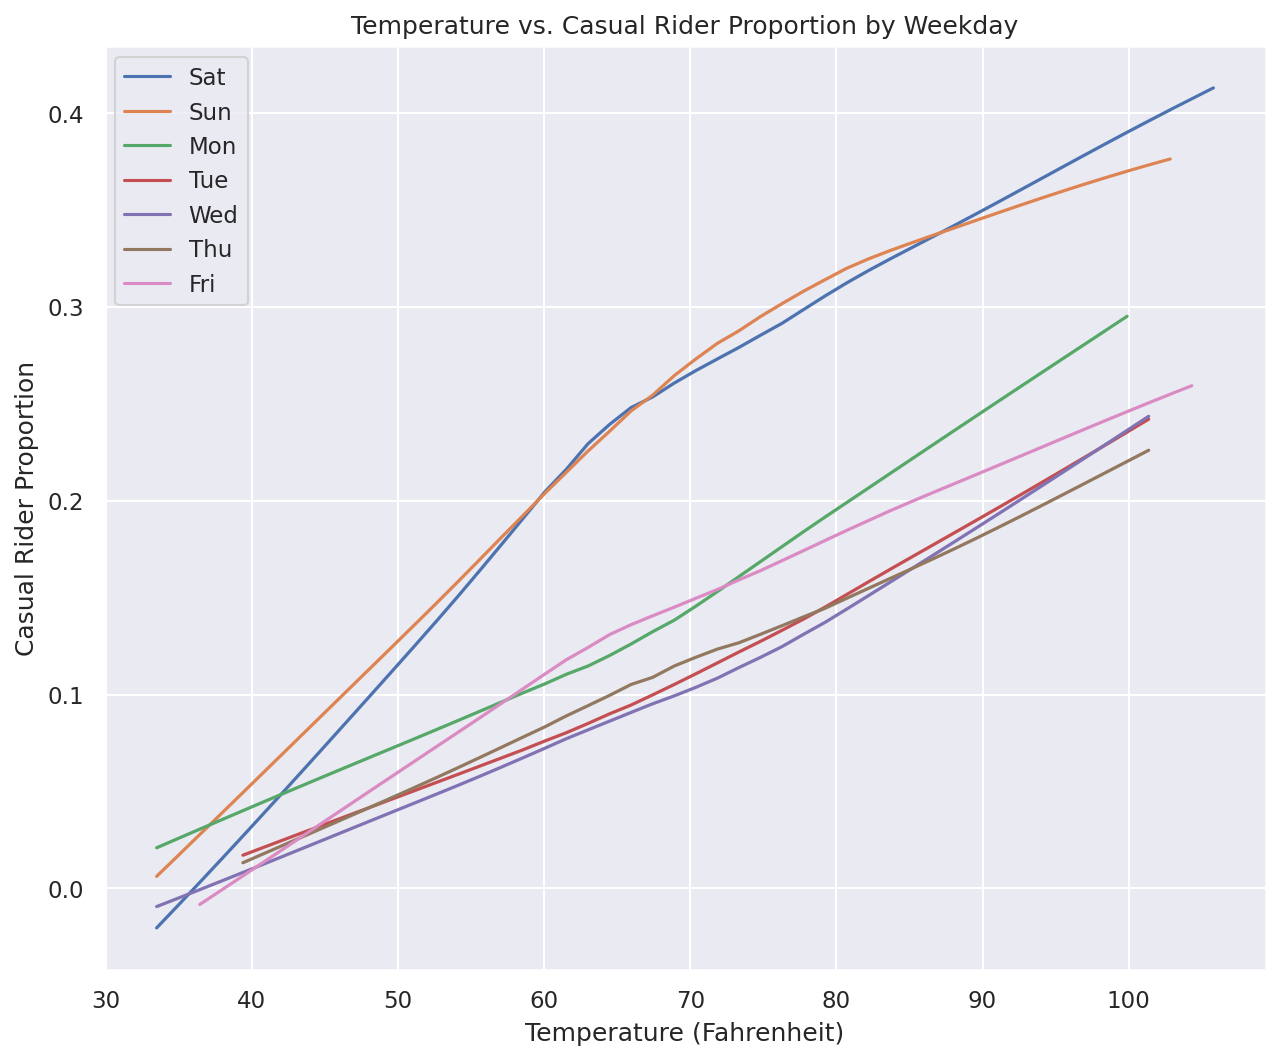

In [28]:
from statsmodels.nonparametric.smoothers_lowess import lowess

plt.figure(figsize=(10,8))
plt.legend(['Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri'])

bike['temp (F)'] = bike['temp']*41*9/5+32

sat=bike[bike['weekday']=='Sat']
saty = lowess(sat['prop_casual'], sat['temp (F)'], return_sorted=False)
sns.lineplot(x=sat['temp (F)'], y=saty, label="Sat")

sun=bike[bike['weekday']=='Sun']
suny = lowess(sun['prop_casual'], sun['temp (F)'], return_sorted=False)
sns.lineplot(x=sun['temp (F)'], y=suny, label="Sun")

mon=bike[bike['weekday']=='Mon']
mony = lowess(mon['prop_casual'], mon['temp (F)'], return_sorted=False)
sns.lineplot(x=mon['temp (F)'], y=mony, label="Mon")

tue=bike[bike['weekday']=='Tue']
tuey = lowess(tue['prop_casual'], tue['temp (F)'], return_sorted=False)
sns.lineplot(x=tue['temp (F)'], y=tuey, label="Tue")

wed=bike[bike['weekday']=='Wed']
wedy = lowess(wed['prop_casual'], wed['temp (F)'], return_sorted=False)
sns.lineplot(x=wed['temp (F)'], y=wedy, label="Wed")

thu=bike[bike['weekday']=='Thu']
thuy = lowess(thu['prop_casual'], thu['temp (F)'], return_sorted=False)
sns.lineplot(x=thu['temp (F)'], y=thuy, label="Thu")

fri=bike[bike['weekday']=='Fri']
friy = lowess(fri['prop_casual'], fri['temp (F)'], return_sorted=False)
sns.lineplot(x=fri['temp (F)'], y=friy, label="Fri")

plt.title('Temperature vs. Casual Rider Proportion by Weekday')
plt.xlabel('Temperature (Fahrenheit)')
plt.ylabel('Casual Rider Proportion')
;

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<br><br>

--- 
### Question 6c
What do you see from the curve plot? How is `prop_casual` changing as a function of temperature? Do you notice anything else interesting?

_As the temperature increases, the proportion of casual riders compared to all riders clearly increases. There is also an observable difference between two weekend days and the rest of the week. On the weekend days, there seems to be more of a positive slop until around 65 degrees, and then the slopes among all days are roughly the same. This difference is likely due to the fact that people don't have work on the weekends so they have more time to casually bike._

<!-- END QUESTION -->

<hr style="border: 1px solid #fdb515;" />

## 7: Expanding our Analysis

<!-- BEGIN QUESTION -->

<br><br>

--- 

### Question 7a

Imagine you are working for a Bike Sharing Company that collaborates with city planners, transportation agencies, and policy makers in order to implement bike sharing in a city. These stakeholders would like to reduce congestion and lower transportation costs. They also want to ensure the bike sharing program is implemented equitably. In this sense, equity is a social value that is informing the deployment and assessment of your bike sharing technology. 

Equity in transportation includes: improving the ability of people of different socio-economic classes, genders, races, and neighborhoods to access and afford the transportation services, and assessing how inclusive transportation systems are over time. 

Do you think the `bike` data as it is can help you assess equity? If so, please explain. If not, how would you change the dataset? You may discuss how you would change the granularity, what other kinds of variables you'd introduce to it, or anything else that might help you answer this question.


_The bike data as it is cannot help to access equity because it has no variables to account for socio-economic classes, genders, races, neighborhoods, etc. In order to improve the data set, I would add variables for each. Since each record is by hour of the day, these categorical variables can represent the most occuring value for each record. This would be the fix without changing granularity. I could change the granularity such that each record represents one biker. This would allow us to assign each biker its own values for the added categorical variables instead of grouping._

<!-- END QUESTION -->



In [29]:
# Use this cell for scratch work. If you need to add more cells for scratch work, add them BELOW this cell.

<!-- BEGIN QUESTION -->

<br><br>

--- 
### Question 7b
[Bike sharing is growing in popularity](https://www.bts.gov/newsroom/bike-share-stations-us) and new cities and regions are making efforts to implement bike sharing systems that complement their other transportation offerings. The [goals of these efforts](https://www.wired.com/story/americans-falling-in-love-bike-share/) are to have bike sharing serve as an alternate form of transportation in order to alleviate congestion, provide geographic connectivity, reduce carbon emissions, and promote inclusion among communities.

Bike sharing systems have spread to many cities across the country. The company you work for asks you to determine the feasibility of expanding bike sharing to additional cities of the U.S. 

Based on your plots in this assignment, what would you recommend and why? Please list at least two reasons why, and mention which plot(s) you drew you analysis from. 

**Note**: There isn't a set right or wrong answer for this question, feel free to come up with your own conclusions based on evidence from your plots! 


_In order to implement bike sharing systems, the company would need to provide enough bikes during the times when biking is most popular and in various districts like residential and business districts. Based on the plot from 5a ("Average Count of Casual vs. Registered by Hour"), the company would need to provide more bikes from the late mornings through the evenings in order for the bike sharing system to help with the company's goal. In addition to the quantity of bikes to provide, location is also important. As observed in the plot, many registered bikers bike as their mode of transportation to and from work, so there would need to be bikes accessible near where these people live and near where they work._

<!-- END QUESTION -->



In [62]:
# Use this cell for scratch work. If you need to add more cells for scratch work, add them BELOW this cell.

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## Congratulations! You have finished Homework 4!
Below, you will see two cells. Running the first cell will automatically generate a PDF of all questions that need to be manually graded, and running the second cell will automatically generate a zip with your autograded answers. **You are responsible for both the coding portion (the zip from Homework 4) and the written portion (the PDF with from Homework 4) to their respective Gradescope portals.** The coding proportion should be submitted to Homework 4 Coding as a single zip file, and the written portion should be submitted to Homework 4 Written as a single pdf file. When submitting the written portion, please ensure you select pages appropriately. 

If there are issues with automatically generating the PDF in the first cell, you can try downloading the notebook as a PDF by clicking on `File -> Save and Export Notebook As... -> PDF`. If that doesn't work either, you can manually take screenshots of your answers to the manually graded questions and submit those. Either way, **you are responsible for ensuring your submission follows our requirements, we will NOT be granting regrade requests for submissions that don't follow instructions.**

In [63]:
from otter.export import export_notebook
from os import path
from IPython.display import display, HTML
export_notebook("hw04.ipynb", filtering=True, pagebreaks=True)
if(path.exists('hw04.pdf')):
    display(HTML("Download your PDF <a href='hw04.pdf' download>here</a>."))
else:
    print("\n Pdf generation fails, please try the other methods described above")

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [64]:
# Save your notebook first, then run this cell to export your submission.
grader.export(run_tests=True)

Running your submission against local test cases...

Your submission received the following results when run against available test cases:

    q1a results: All test cases passed!

    q1b results: All test cases passed!

    q1c results: All test cases passed!

    q6a results: All test cases passed!
